In [1]:
import fitparse
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import math
from fit_extractor import extract_day, extract_coordinates, extract_distance

directory_path = 'data/v1/'

# Lese alle im Verzeichnis vorliegenden Dateien ein
fitfiles = []
for file in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file)
    if os.path.isfile(file_path):
        fitfiles.append(fitparse.FitFile(file_path))

In [2]:
dates = []
coordinates_lat = []
coordinates_long = []
distances = []
for file in fitfiles:
    dates.append(extract_day(file))
    (lat, long) = extract_coordinates(file)
    coordinates_lat.append(lat)
    coordinates_long.append(long)
    distances.append(extract_distance(file))

df = pd.DataFrame({'Datum':dates, 'Koordinaten_lat':coordinates_lat, 'Koordinaten_long':coordinates_long, 'Distanz in m':distances})
df.sort_values(by='Datum', inplace=True)

In [3]:
length = math.ceil(math.sqrt(len(df)))
size = length*length
maxDistanz = df['Distanz in m'].max()
minDistanz = df['Distanz in m'].min()

In [4]:
def genColor(distanz):
    percentage = (distanz-minDistanz)/(maxDistanz-minDistanz)
    #print("{}, {}, {} -> {}".format(distanz, minDistanz, maxDistanz, percentage))
    return (percentage,0,percentage)

C:\Users\Arbeit\AppData\Local\Temp/ipykernel_13424/810065268.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_xticklabels(["{}km".format(int(i)) for i in cbar.get_ticks()])


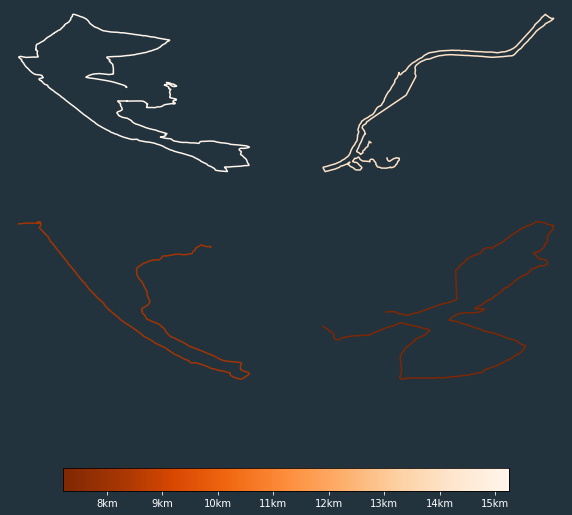

In [7]:
plt.rcParams["figure.figsize"] = (10, 10)


fig, ax = plt.subplots(length, length)

cmap = mpl.cm.Oranges_r
norm = mpl.colors.Normalize(vmin=(minDistanz/1000), vmax=(maxDistanz/1000))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


for i in range(0,size):
    x = math.floor(i/length)
    y = i%length
    #print("{}, {}".format(x, y))
    if i <= length+1:
        entry = df.iloc[i]
        ax[x, y].plot(entry['Koordinaten_lat'],entry['Koordinaten_long'], color=sm.to_rgba(entry['Distanz in m']/1000))
    ax[y,x].axis("off")

cbar = fig.colorbar(sm, ax=[ax[:, :]], orientation="horizontal", shrink=0.8)
cbar.ax.xaxis.set_tick_params(color='white', labelcolor='white')
cbar.ax.set_xticklabels(["{}km".format(int(i)) for i in cbar.get_ticks()])

#cbar = fig.colorbar(sm, ax=[ax[:, :]], orientation="vertical", shrink=0.8)
#cbar.ax.yaxis.set_tick_params(color='white', labelcolor='white')
#cbar.ax.set_yticklabels(["{}km".format(int(i)) for i in cbar.get_ticks()])


fig.patch.set_color((34/255,51/255,61/255))

plt.show()